# S04 T01: Transformació Registre Log amb Regular expressions

## Descripció
L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

## Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

## - Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

Before we upload the data we need to have a look at the file to check who the data has been storaged.

In this occasion it has the structure of an Apacha access log

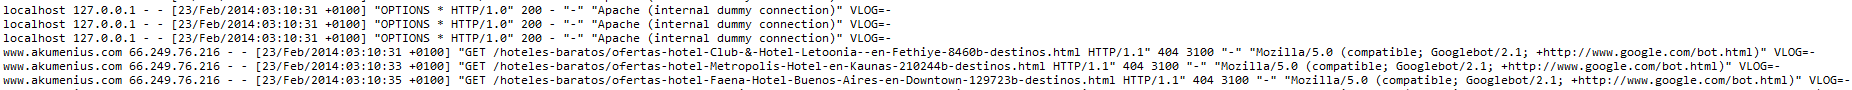

**localhost or www.akumenius.com** - This is the HTTP referer, which represents the address from which the request for the resource originated. (host)

**127.0.0.1 or 66.249.76.216** - IP address of the client that made the request (IP)

[23/Feb/2014:03:10:31 +0100] - date and time of the request(Date & TimeZone)

**"GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1"** - request type and resource being requested (RequestVers)

**200, 400** - HTTP response status code (status)

**3100, 8811** - size of the object returned to the client (lenght)

**"Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"**- This is the User Agent, which identifies information about the browser that the client is using to access the resource.

This gives the site that the client reports having been referred from. (This should be the page that links to or includes (referrer)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import requests

We import the data using RegEx. We have investigate the best separation RegEx using www.regex101.com

In [179]:
df=pd.read_csv('Web_access_log-akumenius.com.txt', sep=(r'(?P<host>.*?) (?P<ip>.*?) (?P<remote_log_name>.*?) (?P<userid>.*?) \[(?P<date>.*?)(?= ) (?P<timezone>.*?)\] \"(?P<request_method>.*?) (?P<path>.*?)(?P<request_version> HTTP/.*)?\" (?P<status>.*?) (?P<length>.*?) \"(?P<referrer>.*?)\" \"(?P<user_agent>.*?)\"'), header=None);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [180]:
df.shape

(261873, 15)

In [181]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31,100.0,OPTIONS,*,HTTP/1.0,200.0,-,-,Apache (internal dummy connection),VLOG=-
1,NaN,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31,100.0,OPTIONS,*,HTTP/1.0,200.0,-,-,Apache (internal dummy connection),VLOG=-
2,NaN,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31,100.0,OPTIONS,*,HTTP/1.0,200.0,-,-,Apache (internal dummy connection),VLOG=-
3,NaN,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31,100.0,OPTIONS,*,HTTP/1.0,200.0,-,-,Apache (internal dummy connection),VLOG=-
4,NaN,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31,100.0,OPTIONS,*,HTTP/1.0,200.0,-,-,Apache (internal dummy connection),VLOG=-


In [182]:
# Rename the usefull columns.
df.rename(columns={1: 'host', 2: 'IP', 4: 'userID', 5: 'Date', 6: 'TimeZone', 7: 'RequestMethod', 8:'path', 9: 'RequestVers',
                  10: 'status', 11: 'lenght', 12: 'referrer', 13: 'UserAgent'}, inplace=True)

## - Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

I investigate the information of each column to clean up the data

Column 0

In [183]:
df[0].isnull().sum()

261831

We note that from the 261873 rows, there are 42 which are not null. Let´s check the values

In [184]:
df[0].unique()

array([nan,
       'localhost 220.181.108.108 - - [23/Feb/2014:14:14:41 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 69.61.47.114 - - [23/Feb/2014:16:42:58 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 220.181.108.79 - - [23/Feb/2014:19:21:43 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 188.87.251.64 - - [24/Feb/2014:08:48:59 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 180.76.5.214 - - [24/Feb/2014:10:23:25 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:00 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:01 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 62.175.136.122 - - [24/Feb/2014:13:08:02 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:28:49 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:30:51 +0100] "-" 408 - "-" "-" VLOG=-',
       'localhost 87.111.221.104 - - [24/Feb/2014:13:30:55 +01

We notice that the not null have an HTTP code 408 (Request Timeout) or 400 (Bad Request), which are errors and will not have any usefull information, therefore we proceed to delete the rows and the empty column 0

In [185]:
df['status'].isnull().sum() #As all the info remain in column 0, the status column is null on the same 42 rows

42

In [186]:
df = df[df.status.notnull()] #remove rows with NO nulls on status column

In [187]:
df.shape

(261831, 15)

In [188]:
df[0].unique() # Column 0 can be removed as it only contain null

array([nan], dtype=object)

In [189]:
df[3].unique() # Column 3 can be removed as it only contain "-"

array(['-'], dtype=object)

In [190]:
df[14].unique()# Column 14 can be removed as it only contain " VLOG=-"

array([' VLOG=-'], dtype=object)

We convert to Data / Time the columns imported

In [191]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%b/%Y:%H:%M:%S') #We convert the Data column from being an object to a date

In [192]:
df.Date[1] #To check that the conversion has done correctly

Timestamp('2014-02-23 03:10:31')

In [193]:
df['TimeZone'].unique() # Date and Time always in the same zone, therefore this column do not add any value and can be removed

array([100.])

In [194]:
#We remove the columns mentioned above
df = df.drop([0, 3, 14, 'TimeZone'], axis=1)

In [195]:
df['userID'].unique() 

array(['-', 'clarcat'], dtype=object)

In [196]:
df['userID'].describe()

count     261831
unique         2
top            -
freq      261804
Name: userID, dtype: object

Column 'userID' initially seem to have a single value of '-' but it also contain a userID 'clarcat' that only appear in 27 of the 261831 logs.

In [197]:
df['referrer'].unique()

array(['-',
       'http://www.akumenius.com/hoteles-baratos/ofertas-hotel-Playa-Blanca-All-Inclusive-en-Cayo%20Largo_CUBA-62359b.html',
       'http://www.akumenius.com/', ...,
       'http://www.akumenius.com/booking/152186/t/BARCELO%20DOMINICAN%20BEACH/4',
       'http://www.akumenius.com/hotelDetailPopup/49612/b',
       'http://www.akumenius.com/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Phuket_TAILANDIA-con-Windsurf'],
      dtype=object)

In [198]:
df['referrer'].describe()

count     261831
unique      2507
top            -
freq       99505
Name: referrer, dtype: object

In [199]:
df[df['referrer'] != '-'].head()

,host,IP,userID,Date,RequestMethod,path,RequestVers,status,lenght,referrer,UserAgent
357,www.akumenius.com,199.30.20.223,-,2014-02-23 03:18:51,GET,/includes/css/style.css,HTTP/1.1,200.0,3637,http://www.akumenius.com/hoteles-baratos/ofert...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
358,www.akumenius.com,199.30.20.223,-,2014-02-23 03:18:51,GET,/modules/raton/views/themes/bcoos/css/buttons_...,HTTP/1.1,200.0,48,http://www.akumenius.com/hoteles-baratos/ofert...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
359,www.akumenius.com,199.30.20.223,-,2014-02-23 03:18:51,GET,/modules/raton/views/themes/bcoos/css/2column_...,HTTP/1.1,200.0,15439,http://www.akumenius.com/hoteles-baratos/ofert...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
361,www.akumenius.com,199.30.20.223,-,2014-02-23 03:18:51,GET,/modules/raton/views/themes/bcoos/css/raton.css,HTTP/1.1,200.0,17458,http://www.akumenius.com/hoteles-baratos/ofert...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
362,www.akumenius.com,199.30.20.223,-,2014-02-23 03:18:51,GET,/libraries/jqueryui/css/ui-lightness/jquery-ui...,HTTP/1.1,200.0,33530,http://www.akumenius.com/hoteles-baratos/ofert...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


## - Exercici 3
Geolocalitza les IP's.

In [200]:
df['IP'].describe() # We check the number if unique IPs to check which free IP tools can be used

count            261831
unique             2920
top       66.249.76.216
freq              46382
Name: IP, dtype: object

We group the unique IPs in a new dataframe

In [201]:
df2 = df.groupby('IP')
df3 = pd.DataFrame(df2)
df3 = df3.rename(columns={0: 'IP', 1: 'Host'})

In [202]:
df3.head()

,IP,Host
0,101.199.108.59,host IP user...
1,101.226.167.226,host IP use...
2,107.178.37.48,host IP userI...
3,107.178.38.221,host IP user...
4,107.21.14.116,host IP userI...


We used ipinfo to search for the IP locations

In [203]:
import ipinfo
access_token = 'b0dc8241cd52e7'
handler = ipinfo.getHandler(access_token)

In [204]:
# Information about the IP address is saved in a new dataframe df_IP
df_IP = pd.DataFrame() 
for index, IP in enumerate(df3.IP):
    details = handler.getDetails(IP)
    df_IP = df_IP.append(details.all, ignore_index=True)

In [205]:
df_IP

,ip,city,region,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon,anycast
0,101.199.108.59,Beijing,Beijing,CN,"39.9075,116.3972",Asia/Shanghai,China,39.9075,116.3972,NaN,NaN,NaN,NaN,NaN
1,101.226.167.226,Shanghai,Shanghai,CN,"31.2222,121.4581",Asia/Shanghai,China,31.2222,121.4581,AS4812 China Telecom (Group),NaN,NaN,NaN,NaN
2,107.178.37.48,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-37-48.ip.cloudmosa.com,95103,NaN,NaN
3,107.178.38.221,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-38-221.ip.cloudmosa.com,95103,NaN,NaN
4,107.21.14.116,Ashburn,Virginia,US,"39.0437,-77.4875",America/New_York,United States,39.0437,-77.4875,"AS14618 Amazon.com, Inc.",ec2-107-21-14-116.compute-1.amazonaws.com,20147,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,95.63.234.126,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS12430 VODAFONE ESPANA S.A.U.,static-126-234-63-95.ipcom.comunitel.net,28001,NaN,NaN
2916,95.63.60.249,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS12430 VODAFONE ESPANA S.A.U.,static-249-60-63-95.ipcom.comunitel.net,28001,NaN,NaN
2917,96.242.31.129,Bayonne,New Jersey,US,"40.6687,-74.1143",America/New_York,United States,40.6687,-74.1143,"AS701 MCI Communications Services, Inc. d/b/a ...",pool-96-242-31-129.nwrknj.fios.verizon.net,07002,NaN,NaN
2918,98.137.206.41,New York City,New York,US,"40.7313,-73.9892",America/New_York,United States,40.7313,-73.9892,NaN,unknown.yahoo.com,10003,NaN,NaN


I create a copy of the main dataframe and merge with the grouped IP information from df_IP

In [233]:
df_copy = df.copy() 

In [237]:
df_copy = pd.merge(df_copy, df_IP, left_on='IP', right_on='ip')

We check if the dataframes have merged correctly

In [238]:
df_copy.columns 

Index(['host', 'IP', 'userID', 'Date', 'RequestMethod', 'path', 'RequestVers',
       'status', 'lenght', 'referrer', 'UserAgent', 'Host', 'ip', 'city',
       'region', 'country', 'loc', 'timezone', 'country_name', 'latitude',
       'longitude', 'org', 'hostname', 'postal', 'bogon', 'anycast'],
      dtype='object')

In [250]:
df_copy[df_copy.IP == '66.249.76.216']

,host,IP,userID,Date,RequestMethod,path,RequestVers,status,lenght,referrer,...,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon,anycast
13892,www.akumenius.com,66.249.76.216,-,2014-02-23 03:10:31,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...,HTTP/1.1,404.0,3100,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
13893,www.akumenius.com,66.249.76.216,-,2014-02-23 03:10:33,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...,HTTP/1.1,404.0,3100,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
13894,www.akumenius.com,66.249.76.216,-,2014-02-23 03:10:35,GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...,HTTP/1.1,404.0,3100,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
13895,www.akumenius.com,66.249.76.216,-,2014-02-23 03:10:38,GET,/hoteles-baratos/ofertas-hotel-Kensington-Town...,HTTP/1.1,404.0,3100,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
13896,www.akumenius.com,66.249.76.216,-,2014-02-23 03:10:39,GET,/destinos-baratos/destinosEstrelles/hoteles-en...,HTTP/1.1,200.0,8811,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60269,www.akumenius.com,66.249.76.216,-,2014-03-02 03:00:15,GET,/destinosCaracteristicas/hoteles-baratos-en-CO...,HTTP/1.1,200.0,6401,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
60270,www.akumenius.com,66.249.76.216,-,2014-03-02 03:00:48,GET,/destinos-baratos/hoteles-en-Ensenada_MEXICO,HTTP/1.1,200.0,15614,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
60271,www.akumenius.com,66.249.76.216,-,2014-03-02 03:01:10,GET,/escapadas/ocio-andorra-327.html,HTTP/1.1,200.0,9258,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN
60272,www.akumenius.com,66.249.76.216,-,2014-03-02 03:05:09,GET,/destinos-caracteristicas/hoteles-baratos-en-B...,HTTP/1.1,200.0,9157,-,...,"50.8505,4.3488",Europe/Brussels,Belgium,50.8505,4.3488,AS15169 Google LLC,crawl-66-249-76-216.googlebot.com,1000,NaN,NaN


## - Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

I analyse the new data provided by the IP

In [254]:
df_IP.country_name.describe()

count      2914
unique       64
top       Spain
freq       1274
Name: country_name, dtype: object

There are IPs from 64 countries being Spain the one a higher frequency.

In [279]:
df_top10_country = df_IP.country_name.value_counts().head(10)
df_top10_country

Spain            1274
United States     672
China             207
Japan             113
France            110
Germany            74
Hong Kong          62
Brazil             37
Mexico             33
Belgium            32
Name: country_name, dtype: int64

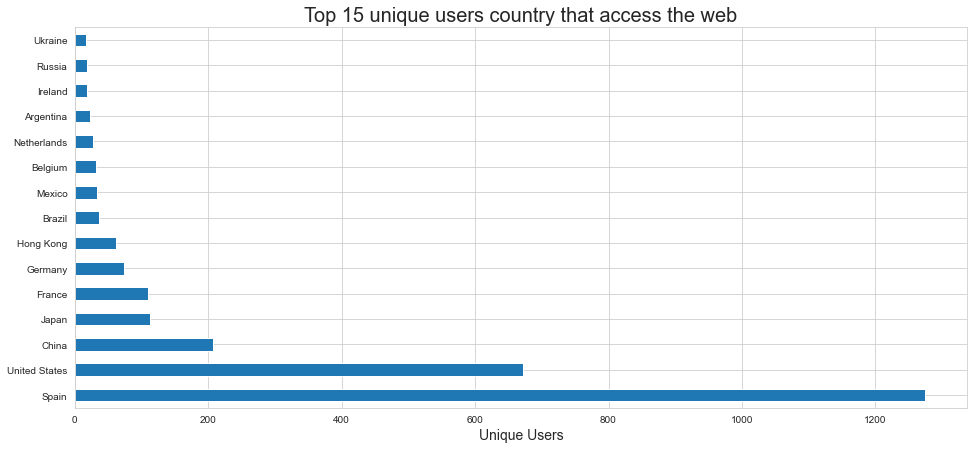

In [333]:
plt.figure(figsize=(16,7))
sns.set_style("whitegrid")

df_IP['country_name'].value_counts()[:15].plot(kind='barh')
plt.title('Top 15 unique users country that access the web', size=20)
plt.xlabel('Unique Users', size=14);

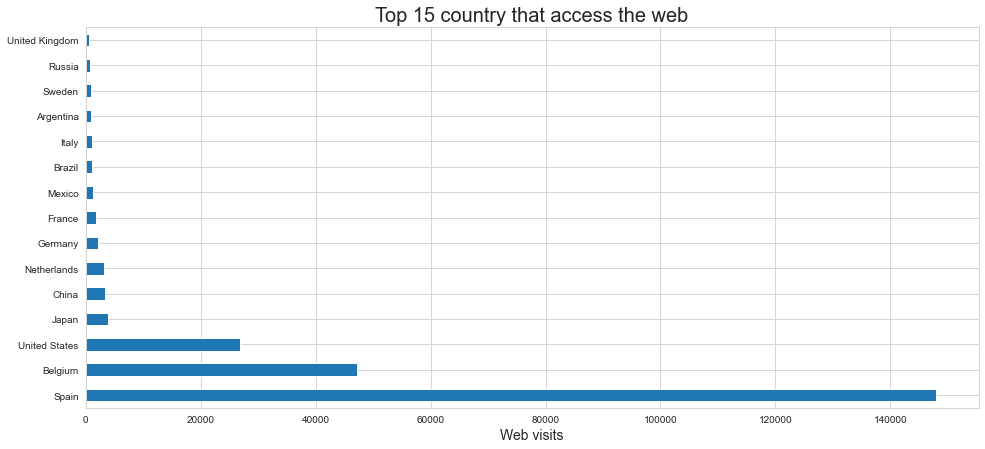

In [334]:
plt.figure(figsize=(16,7))
df_copy['country_name'].value_counts()[:15].plot(kind='barh')
plt.title('Top 15 country that access the web', size=20)
plt.xlabel('Web visits', size=14);

The above graphs shows that 1274 unique users from Spain access aprox 150000 times the web

In [298]:
visits_per_country = df_copy['country_name'].value_counts()/df_IP['country_name'].value_counts()
visits_per_country.sort_values (ascending=False).head(10)

Belgium                               1477.062500
Bonaire, Saint Eustatius and Saba      129.000000
Netherlands                            119.851852
Spain                                  116.117739
Guatemala                               97.000000
Italy                                   87.000000
Sweden                                  81.454545
Portugal                                70.333333
Nicaragua                               65.500000
Uruguay                                 60.500000
Name: country_name, dtype: float64

But the country that visit the web more times by IP in average is Belgium

We now analize the web visits by city

In [317]:
df_IP.city.value_counts()

Madrid                  423
Quincy                  122
Barcelona               116
Tokyo                   113
Beijing                 110
                       ... 
Florence                  1
Foz                       1
Villaviciosa de Odón      1
Alameda                   1
Chico                     1
Name: city, Length: 560, dtype: int64

In [318]:
df_copy.city.value_counts()

Madrid           57028
Brussels         47258
Barcelona        10093
Sevilla           9766
Valencia          5680
                 ...  
Arequipa             1
Porto                1
Rankweil             1
El Cajon             1
Downers Grove        1
Name: city, Length: 560, dtype: int64

In [322]:
visit_per_city = df_copy.city.value_counts()/df_IP.city.value_counts()
visit_per_city.sort_values(ascending=False)

Brussels         1687.785714
Écija             531.000000
Phoenix           523.000000
Abarán            511.000000
New York City     498.166667
                    ...     
Arundel             1.000000
Mazatlán            1.000000
Melbourne           1.000000
Melilla             1.000000
San Francisco       1.000000
Name: city, Length: 560, dtype: float64

Madrid is the city with more unique users visiting the web
Also Madrid is the city that visit the web more often
Brussels is the city with more visits in average to the web

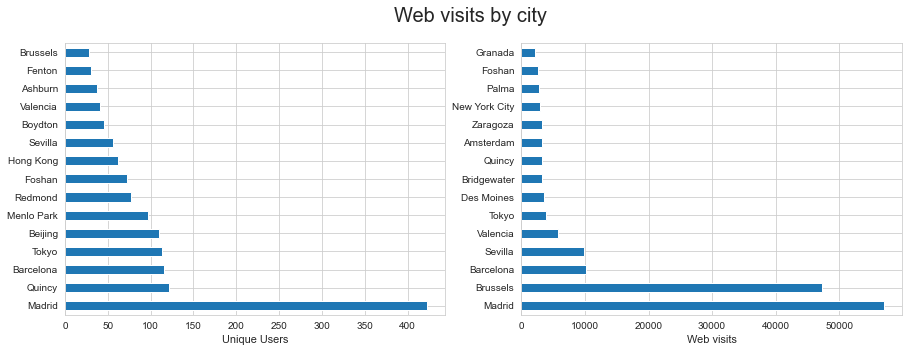

In [339]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Web visits by city', size=20)
df_IP['city'].value_counts()[:15].plot(kind='barh', ax=ax1)
df_copy['city'].value_counts()[:15].plot(kind='barh', ax=ax2)
ax1.set_xlabel('Unique Users', size=11);
ax2.set_xlabel('Web visits', size=11);